# Lab 2.2: Basic Radar Design

In [1]:
%matplotlib widget
import rad.css as css
import rad.example as ex
import rad.quiz as qz
from rad.const import c, k
from rad.radar import to_db, from_db, deg2rad, rad2deg
from math import sqrt, sin, asin, cos, acos, tan, atan2, pi, log, log10
css.add_custom_css()

**Reminders**: 

- Hit the *<font color="DarkBlue">Run All</font>* button <img width="18px" src="img/run_all_icon.png"> button above before continuing
- Useful formulae and definitions are available in [Reference](Reference.ipynb)

From [Lab 2.1: Radar Range Equation](2_1_Range_Range_Equation.ipynb), we saw that if we know certain aspects of the radar system (e.g., transmit energy, transmit gain, etc.), it is possible to derive the received energy from a target echo. If we also know the characteristics of the noise in the radar system, we can also calculate the signal-to-noise ratio (SNR). The SNR is a key quantity that allows us to deduce whether we should be able to detect a target echo in a given situation. If the SNR is high ($\gg 0~\mathrm{dB}$), the echo should be confidently detected; if the SNR is low ($\leq 0~\mathrm{dB}$), it will be difficult to discern the echo from the noise. (We will discuss this in more detail in [Lab 3.2: Detection](3_2_Detection.ipynb).)

As a quick recap, we can see in the interactive example below how the received energy of the echo (in **black**) compares to the energy of the noise (in **<font color="Red">red</font>**) for a dish radar with adjustable properties:

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Radar</b>"), FloatSlider(value=400.0, desc…

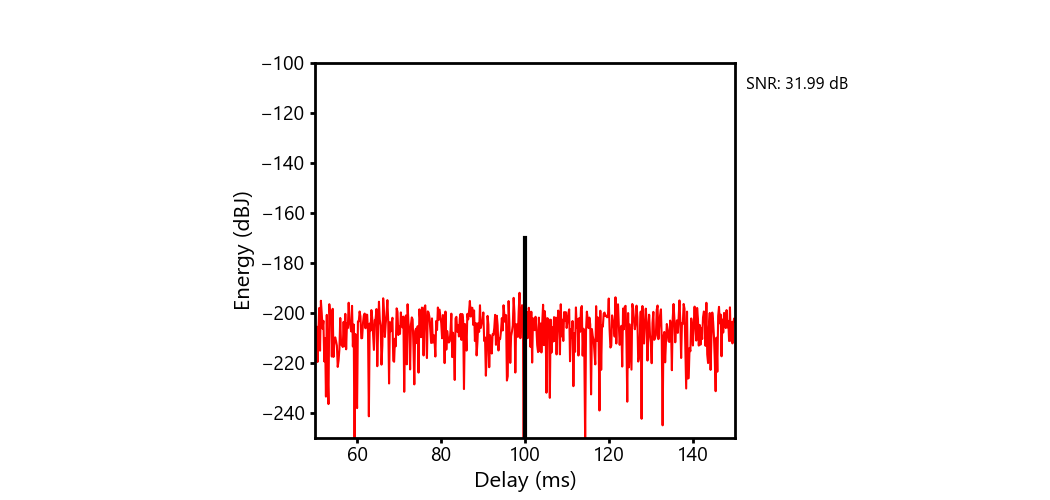

In [2]:
ex.ex_2_2_1()

## Sensitivity Design

Designing a radar to obtain a desired SNR is often called controlling its **sensitivity**; this is one of the primary factors used when crafting a radar system. A sensitivity objective will often come in the form like the following: "$15~\mathrm{dB}$ SNR on a $-5~\mathrm{dBsm}$ target at a range of $100~\mathrm{km}$". To see how to satisfy this requirement and understand what design decisions are important, let us look back at the formula for SNR; specifically, the SNR from a target echo was shown to be:

$$
\mathrm{SNR} = \frac{\mathcal{E}_t G_t(\theta) G_r(\theta) \lambda^2 \sigma}{(4\pi)^3 r^4 k T_s}
$$

where

- $\mathcal{E}_t$ is the transmitted energy $(\mathrm{J})$
- $G_t(\theta)$ is the transmit gain in the transmit direction $\theta$
- $G_r(\theta)$ is the receive gain in the receive direction $\theta$
- $\lambda$ is the transmission wavelength ($\mathrm{m}$)
- $\sigma$ is the radar cross section of the target ($\mathrm{m^2}$)
- $r$ is the range to the target ($\mathrm{m}$)

It is helpful at this point to identify which terms in the SNR equation are controlled by the radar designer. Here is the SNR from a target echo split into terms regarding the radar and the target:

<div style="text-align: center"> <img src="img/snr_design.png" justify="center" width="450px"></img> </div>

More specifically, the factors we can control as a radar designer are:
- $\mathcal{E}_t$ is controlled by transmit power and transmit duration
- $G_t(\theta)$ is controlled by transmit aperture shape and transmit frequency
- $G_r(\theta)$ is controlled by receive aperture shape and transmit frequency
- $\lambda$ is controlled by transmit frequency
- $T_s$ is the system noise temperature

The factors dictated by the scenarios of interest:
- $\sigma$: Target shape, material, orientation
- $r$: Radar-target geometry

Thus, the application dictates what values of RCS and range are relevant, and then it is our job to design a radar that can achieve a desired SNR by choosing: transmit energy, transmit/receive aperture, and transmit frequency. In general, cost *increases* as:

- Transmit energy, $\mathcal{E}_t$ , increases
- Aperture size increases
- Transmit frequency, $f$ , increases
- System noise temperature, $T_s$ , decreases

To impart intuition, let us work through an example. We are building a dish radar system to achieve the given sensitivity objective from above: "$15~\mathrm{dB}$ SNR on a $-5~\mathrm{dBsm}$ target at a range of $100~\mathrm{km}$". We have a budget of $\$100\mathrm{k}$ and the radar manufacturer gives us the following price sheet:



| Hardware                 | Price                                    |
|--------------------------|------------------------------------------|
| Dish Radius              | $\$10000/\mathrm{m}$                     |
| Transmit Energy          | $\$20/\mathrm{mJ}$                      |
| Transmit Frequency       | $\$10/\mathrm{MHz}$                      |
| Noise Temperature        | $\$50/^\circ K$ below $1500 ^\circ K$    |

In the interactive example below, try changing the values of the radar design parameters to achieve the sensitivity requirement while staying under budget. In short, try to simultaneously satisfy:

* Price $\leq \$100000$
* SNR $\geq 15~\mathrm{dB}$
* RCS $\leq -5~\mathrm{dBsm}$
* Range $\geq 100~\mathrm{km}$

In [3]:
ex.ex_2_2_2()

## Beamwidth Design

Another key factor in designing a radar is a desired beamwidth; this will decide how accurately we can measure the angle of targets. (We will discuss range measurement accuracy in [Lab 3.1: Radar Transmissions and Receptions](3_1_Radar_Transmissions_and_Receptions.ipynb) and angle accuracy will be revisited in detail in [Lab 4.1: Target Parameter Estimation](4_1_Target_Parameter_Estimation.ipynb).)

We saw in [Lab 1.2: Introduction to Radar](1_2_Introduction_to_Radar.ipynb) that the beamwidth of circular apertures (very common in radar designs) is:

$$
\Delta\theta = 70^\circ\frac{\lambda}{D}
$$

where $D$ is the diameter of the aperture and $\lambda$ is the transmit wavelength. The beamwidth and gain for a circular aperture can be studied in the interactive example below.

interactive(children=(FloatSlider(value=1.0, description='Dish Radius (m)', max=30.0, min=0.1, style=SliderSty…

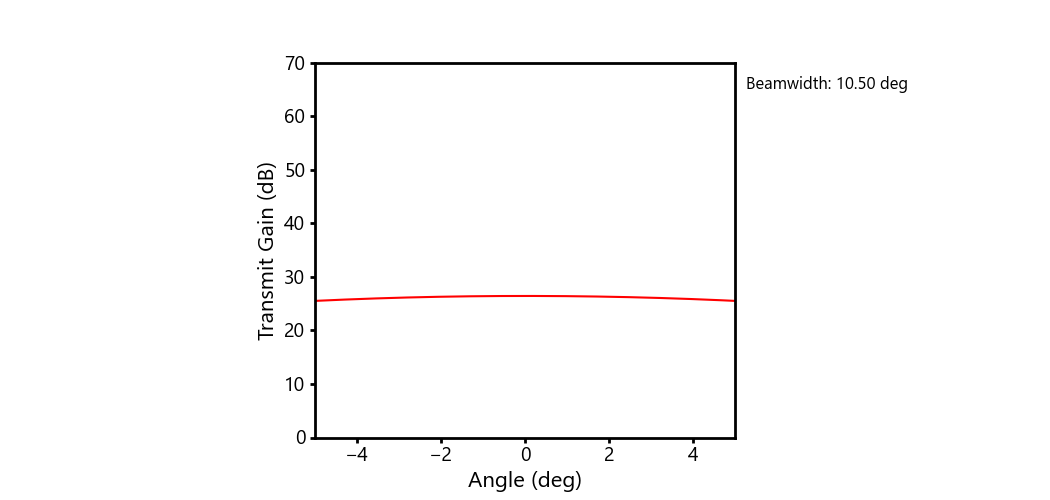

In [4]:
ex.ex_2_2_3()

Another common radar aperture shape is a rectangle. Because the shape is not necessarily symmetrical around its center (like a circular aperture), it has two different beamwidths: one in the horizontal dimension and one in the vertical dimension. The vertical beamwidth, $\Delta \theta_v$ , and horizontal beamwidth, $\Delta \theta_h$ , of a rectangular aperture (in degrees) of height $a$ (in $\mathrm{m}$) and width $b$ (in $\mathrm{m}$) are:

$$
\Delta\theta_v = 57.3^\circ\frac{\lambda}{a}
$$

$$
\Delta\theta_h = 57.3^\circ\frac{\lambda}{b}
$$

where $\lambda$ is the transmit wavelength (in $\mathrm{m}$). Like the circular aperture, you can investigate how the beamwidth and gain for a rectangular aperture change with shape and frequency in the interactive example below.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Controls</b>"), FloatSlider(value=1000.0, …

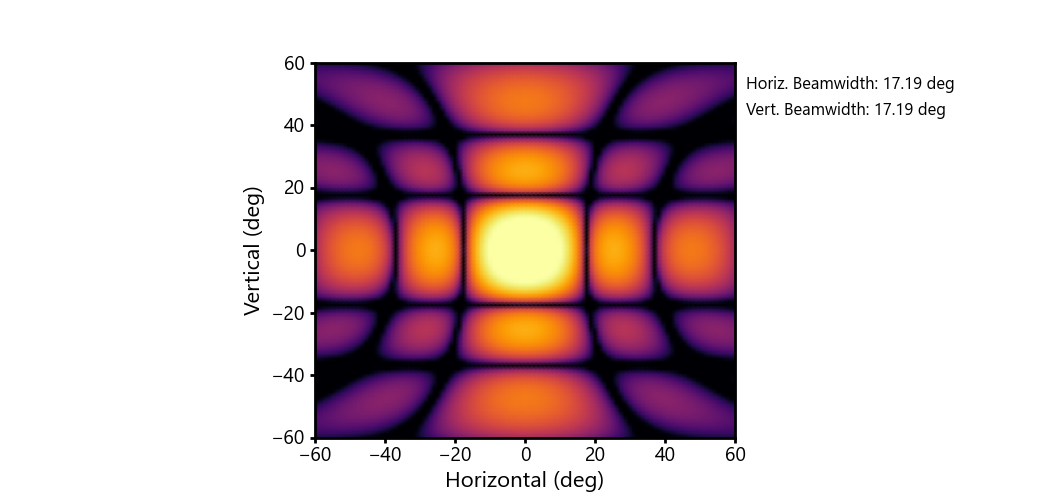

In [5]:
ex.ex_2_2_4()

Now, we can revisit building a radar with a given budget, but now we will have both a sensitivity objective and a desired beamwidth. Try staying under budget in the interactive example below while meeting the following objectives:

* Price $\leq \$110000$
* SNR $\geq 14~\mathrm{dB}$
* Beamwidth $\leq 2~\mathrm{deg}$
* RCS $\leq -10~\mathrm{dBsm}$
* Range $\geq 120~\mathrm{km}$

In [6]:
ex.ex_2_2_5()

Note that there are many more potential design objectives for a radar, e.g., target parameter estimation, tracking, discrimination. We will discuss how radar parameters affect the performance of these objectives in following labs and revisit radar design in the last lab, [Lab 5.1: Radar Design Revisited](5_1_Radar_Design_Revisited.ipynb)

## Meet Robby

As a final exercise, we will meet Robby the radar, which we will use numerous times throughout the remainder of the course. Robby is a test radar in a simulated environment that allows you to change radar parameters on the fly and see how things evolve. More specifically, Robby is a rotating dish radar whose display shows the received signals for every angle on a single screen; a pulse is recorded for every $0.5^\circ$ in azimuth angle. (We will dive into the processing that is happening behind-the-scenes in [Lab 3.1: Radar Transmissions and Receptions](3_1_Radar_Transmissions_and_Receptions.ipynb).) 

As the labs progress, more adjustments can be made to Robby; however, the initial variables are *<font color="DarkBlue">Noise Temperature</font>*, *<font color="DarkBlue">Dish Radius</font>*, and *<font color="DarkBlue">Transmit Frequency</font>*. To use the radar, click on the *<font color="DarkBlue">Scan</font>* button; this will make one full rotation and plot all received pulses. To see an individual pulse, we can use the *<font color="DarkBlue">Pulse Azimuth</font>* slider to display the pulse for a desired azimuth angle. Note that the data are normalized by the average noise energy, so noise samples will be distributed around $0~\mathrm{dB}$ and echoes will have values equal to their signal-to-noise ratio; this is why the scale is marked as SNR.

In the example below, there is a single target with RCS of $5~\mathrm{dBsm}$ located at a range of $6~\mathrm{km}$ and azimuth of $45^\circ$. Try changing radar parameters to see how the response varies.

GridBox(children=(VBox(children=(HTML(value="<b><font color='black'>Radar</b>"), FloatSlider(value=1000.0, des…

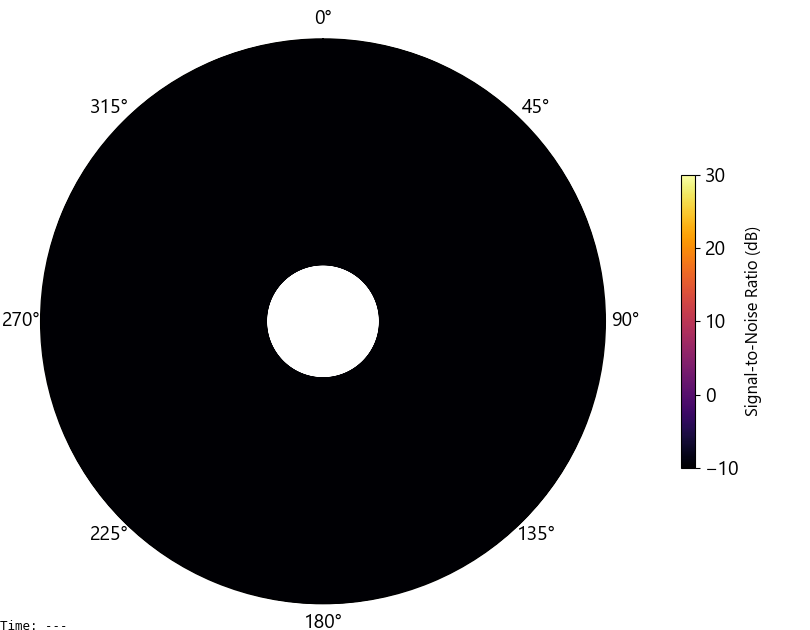

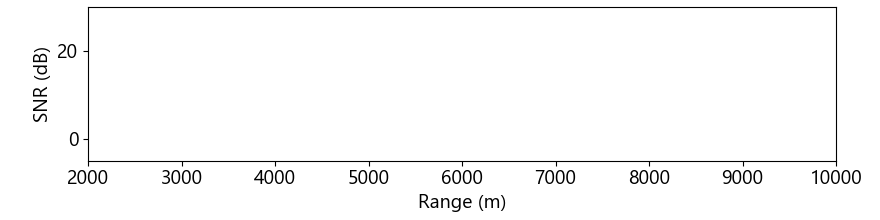

In [7]:
ex.ex_2_2_6()

## Summary

In this lab, we discussed high-level radar design for two common criteria: *sensitivity* and *beamwidth*. We studied through examples how we can tradeoff different radar design choices, e.g., transmit frequency, aperture size, to satisfy these requirements. Additionally, we were introduced to Robby the radar, a test radar that can be altered on the fly to observe changes in radar observations.

## Footnotes

n/a

## References

n/a